### GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

In [1]:
### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
### Reading the dataset

In [4]:
df = pd.read_csv("titanic.csv")

In [5]:
# Shape of the dataframe
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation**

    1. As observed from the dataframe, there are a few features which might not potentially add up any value.
    2. Therefore, we are dropping those columns that introduce redundancy in the data.
    
    Columns to be dropped: ["PassengerId", "Name", "Ticket", "Fare"]

In [7]:
# Dropping the columns from the dataframe.

df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Fare"], axis = 1)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [9]:
print("Dataframe after dropping the features: ")
df.head()

Dataframe after dropping the features: 


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


### Exploratory data analysis

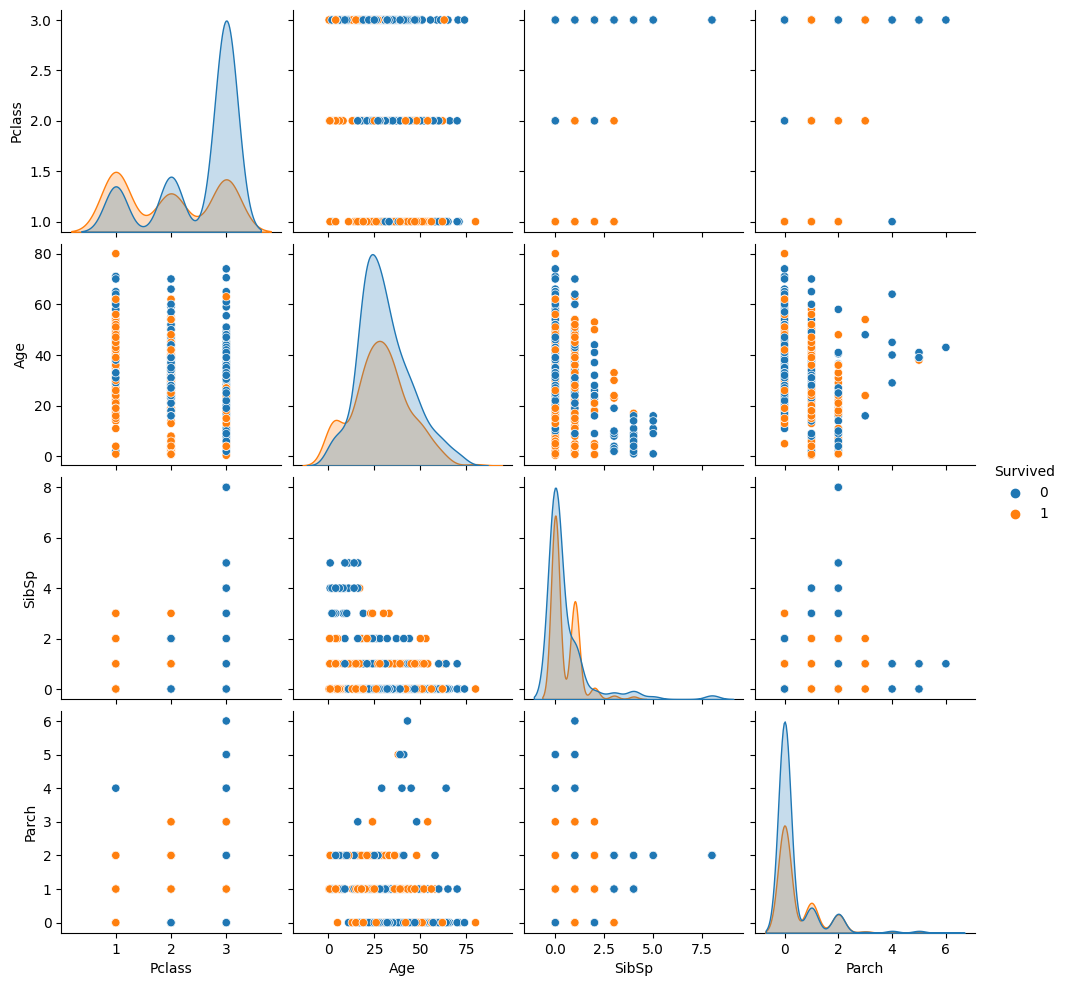

In [10]:
sns.pairplot(df, hue="Survived")

In [11]:
### Survival and death counts

<AxesSubplot: xlabel='Survived', ylabel='count'>

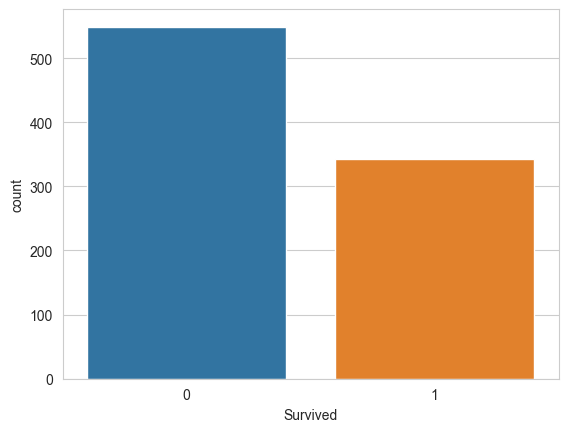

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In [13]:
### Survival rate based on the gender.

<AxesSubplot: xlabel='Survived', ylabel='count'>

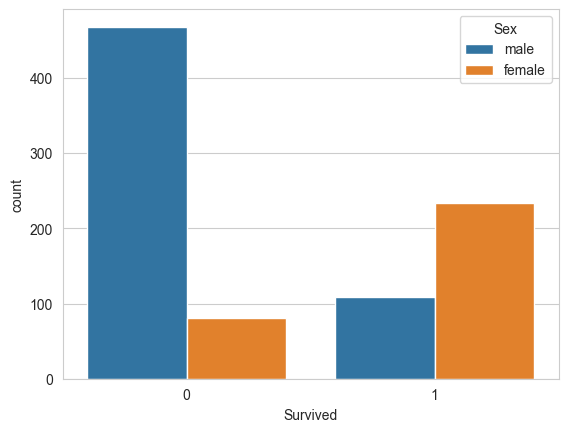

In [14]:
sns.set_style('whitegrid', )
sns.countplot(x='Survived',hue='Sex',data=df)

[Text(0.5, 1.0, 'Survival count w.r.t Passenger class')]

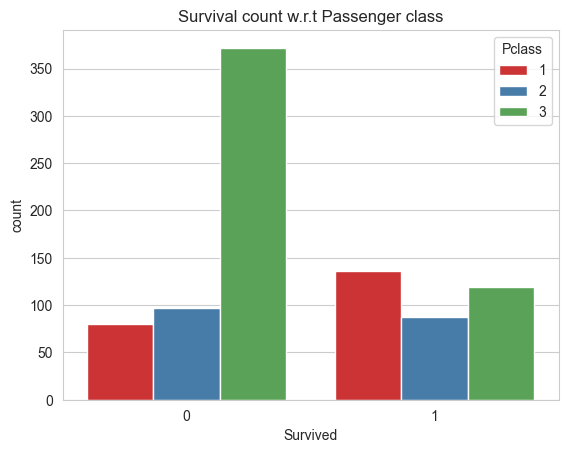

In [15]:
sns.countplot(data = df, x = "Survived", hue = "Pclass", palette="Set1").set(title = "Survival count w.r.t Passenger class")

[Text(0.5, 1.0, 'Survival w.r.t Embarked location')]

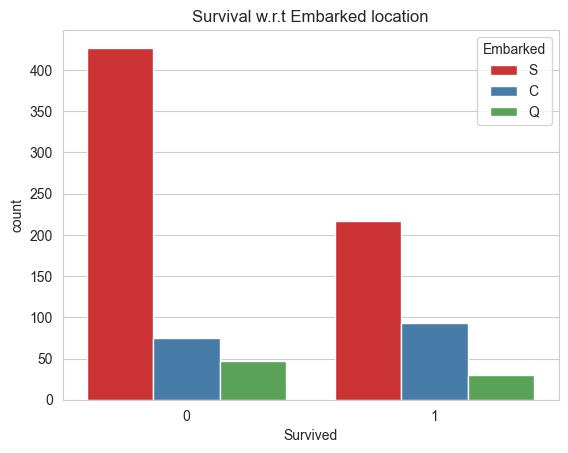

In [16]:
sns.countplot(data = df, x = "Survived", hue = "Embarked", palette = "Set1").set(title = "Survival w.r.t Embarked location")

In [17]:
### Plotting the Age distribution

<AxesSubplot: xlabel='Age', ylabel='Density'>

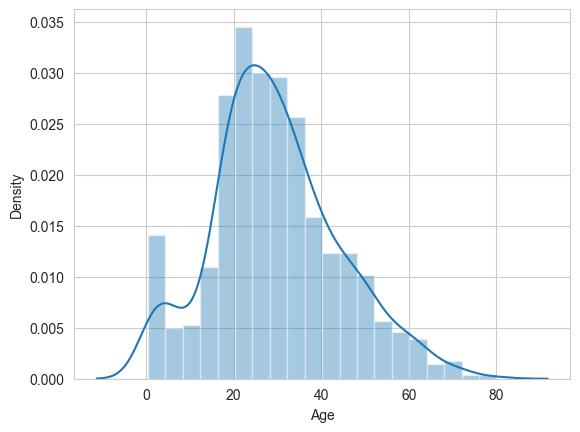

In [18]:
sns.distplot(df["Age"], kde = True)

### Handling categorical features 

In [19]:
# Unique values in Passenger class

df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
### Checking null values

<AxesSubplot: >

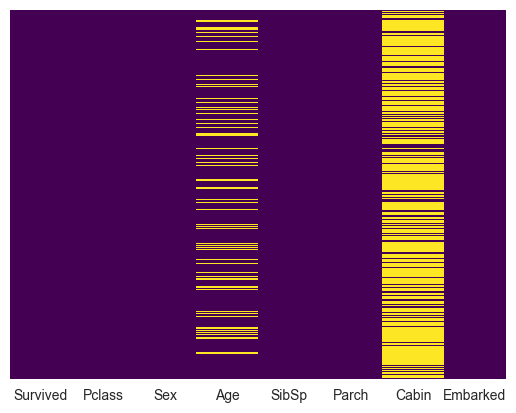

In [23]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [24]:
# Dropping the Cabin Feature as this contains unusual number of missing values.
df.drop(columns = ['Cabin'],axis=1,inplace=True)

### Encoding the features "Embarked", "Sex"

In [25]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


<AxesSubplot: xlabel='SibSp', ylabel='count'>

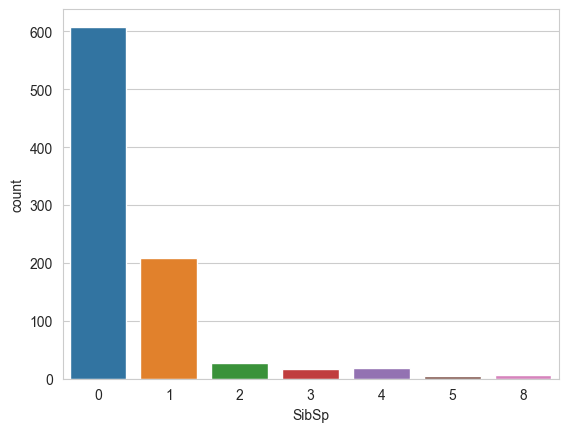

In [27]:
sns.countplot(x='SibSp',data=df)

In [28]:
### Handling the missing values in "Age" column

<AxesSubplot: >

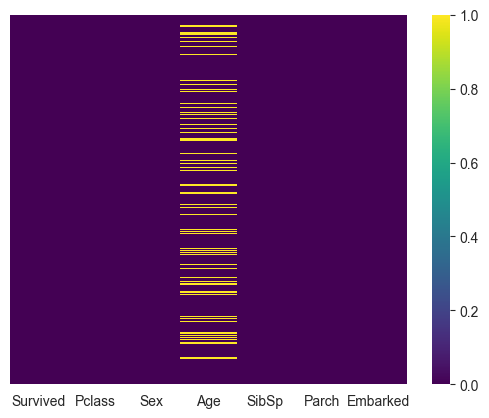

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = "viridis")

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

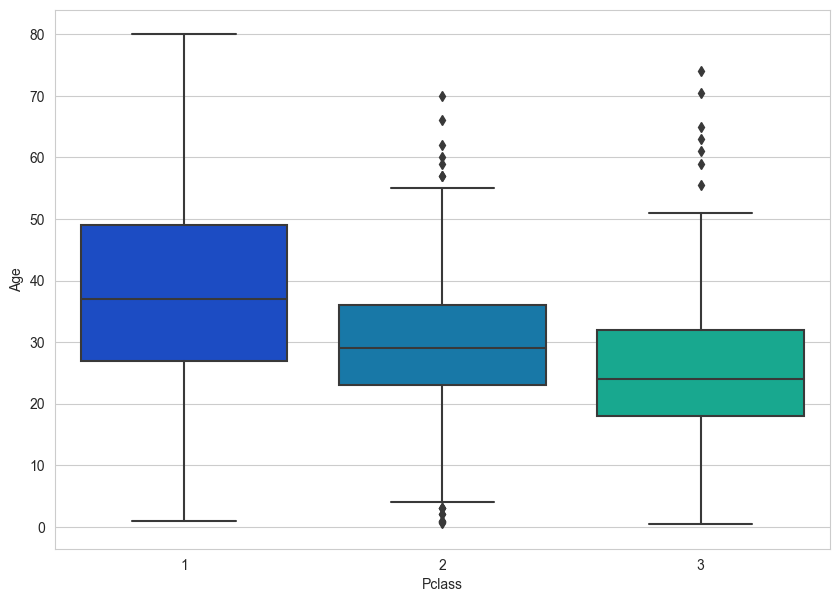

In [30]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [31]:
# Function to replace the missing values in Age column

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

In [33]:
### Converting the continuous values of Age column into ranges (Bins)

In [34]:
df["Age"] = pd.cut(df["Age"], bins = 4, labels = [1, 2, 3, 4])

<AxesSubplot: >

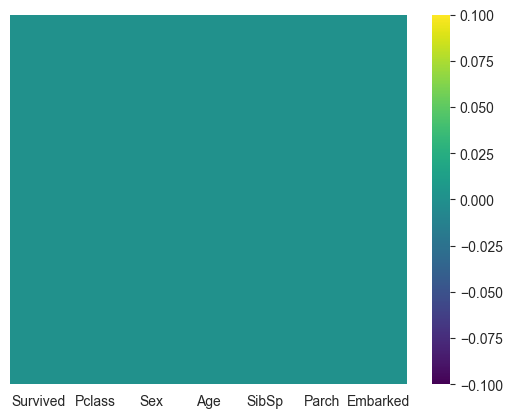

In [35]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = "viridis")

In [36]:
### Since the Naive Bayes is susceptible to zeros, re-labelling the Parch column starting from 1.

In [37]:
Parch_reorder = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6}
df["Parch"] = df.Parch.map(Parch_reorder)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,2,1,1.0,2
1,1,1,0,2,1,1.0,0
2,1,3,0,2,0,1.0,2
3,1,1,0,2,1,1.0,2
4,0,3,1,2,0,1.0,2


In [39]:
df[df["Parch"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
678,0,3,0,3,1,NaN,2


In [40]:
df.iloc[678, 5] = 0.0

In [41]:
df["Age"] = df["Age"].astype(int)
# df["Fare"] = df["Fare"].astype(int)
df["Parch"] = df["Parch"].astype(int)

In [42]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Embarked    int64
dtype: object

In [43]:
### Separating the features into predictor and target values.

In [44]:
y = df["Survived"]
X = df.drop(columns = ["Survived"], axis = 1)

In [45]:
### Train test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
def plot_confusion_matrix(y_test, predictions):
    
    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    
    plt.figure(figsize = (4,3))
    sns.heatmap(cm_norm, 
            annot=True, 
            cmap="Spectral")
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual/Observed', fontsize=15);
    plt.title('Confusion Matrix')

### Naive Bayes Classifier

In [48]:
# Scaling the parameters
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
guassian_nb = GaussianNB()

param_grid = {'var_smoothing' : np.logspace(0,-9, num=100)}

cv = StratifiedKFold(n_splits=5)

guassian_nb = GridSearchCV(guassian_nb, param_grid = param_grid, cv = cv, scoring="balanced_accuracy") 

guassian_nb.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3366...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='balanced_accuracy')

In [50]:
guassian_nb.best_params_

{'var_smoothing': 0.04328761281083057}

In [51]:
y_pred  = guassian_nb.predict(X_test_scaled)

In [52]:
confusion_matrix(y_pred, y_test)

array([[103,  25],
       [ 10,  41]])

In [53]:
accuracy_score(y_pred, y_test)

0.8044692737430168

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       128
           1       0.62      0.80      0.70        51

    accuracy                           0.80       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.83      0.80      0.81       179



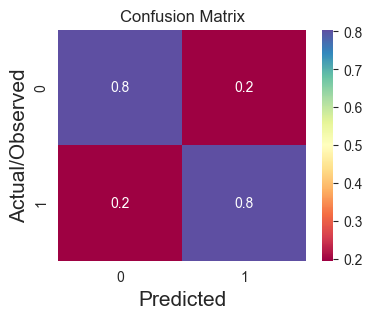

In [55]:
plot_confusion_matrix(y_pred, y_test)

### Selected Features - Naive Bayes

In [56]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.066946,-0.035322,0.091714,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.292200,0.083081,0.010651,0.157112
Sex,-0.543351,0.131900,1.000000,0.083042,-0.114631,-0.238477,0.104057
Age,-0.066946,-0.292200,0.083042,1.000000,-0.200889,-0.168404,-0.004734
SibSp,-0.035322,0.083081,-0.114631,-0.200889,1.000000,0.421591,0.066654
Parch,0.091714,0.010651,-0.238477,-0.168404,0.421591,1.000000,0.033528
Embarked,-0.163517,0.157112,0.104057,-0.004734,0.066654,0.033528,1.000000


<AxesSubplot: >

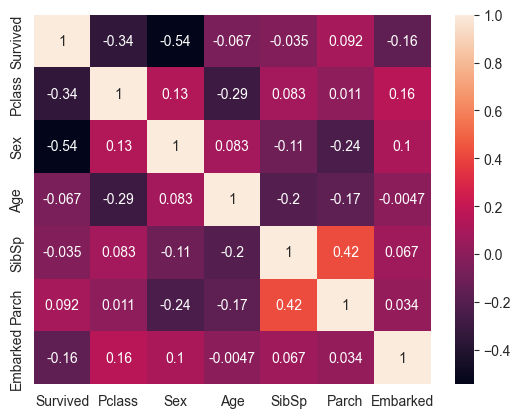

In [57]:
sns.heatmap(df.corr(), annot=True)

- Based on the correlation matrix, we can interpret that the features ["Pclass", "Sex", "Embarked"] have the highest correlation with that of the output.

In [58]:
X_sel = df[["Pclass", "Sex", "Embarked"]]
y_sel = df["Survived"]

In [59]:
X_sel.head()

,Pclass,Sex,Embarked
0,3,1,2
1,1,0,0
2,3,0,2
3,1,0,2
4,3,1,2


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_sel, y_sel, test_size=0.2)

In [61]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
print("Accuracy Score: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.76      0.69      0.72        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

Accuracy Score:  0.7988826815642458


In [63]:
print(confusion_matrix(y_pred, y_test))

[[96 15]
 [21 47]]


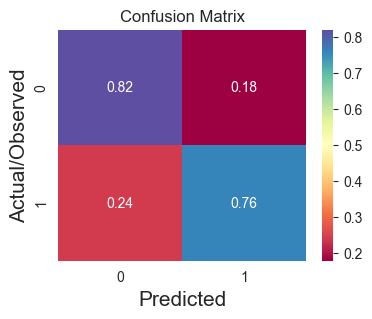

In [64]:
plot_confusion_matrix(y_test, y_pred)

### Using oversampling

In [65]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)

In [68]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm  = train_test_split(X_sm, y_sm, test_size=0.2, shuffle = True)

In [69]:
y_sm.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [70]:
guassian_nb_2 = GaussianNB()
guassian_nb_2.fit(X_train_sm, y_train_sm)

GaussianNB()

In [71]:
y_pred_sm = guassian_nb_2.predict(X_test_sm)

In [72]:
confusion_matrix(y_pred_sm, y_test_sm)

array([[76, 19],
       [36, 89]])

In [73]:
accuracy_score(y_pred_sm, y_test_sm)

0.75

In [74]:
print(classification_report(y_pred_sm, y_test_sm))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73        95
           1       0.82      0.71      0.76       125

    accuracy                           0.75       220
   macro avg       0.75      0.76      0.75       220
weighted avg       0.76      0.75      0.75       220



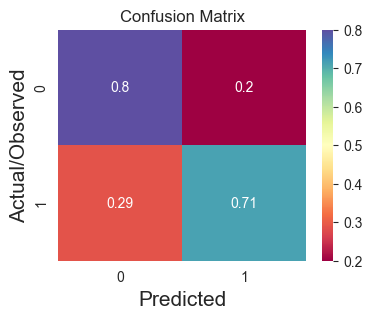

In [75]:
plot_confusion_matrix(y_pred_sm, y_test_sm)

### Grid Search CV

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,2,1,1,2
1,1,1,0,2,1,1,0
2,1,3,0,2,0,1,2
3,1,1,0,2,1,1,2
4,0,3,1,2,0,1,2


In [77]:
multinomial_model = MultinomialNB()

param_grid = {
                "alpha": [0, 0.2, 0.4, 0.6, 0.8, 1.0],
                "fit_prior": [True, False]
             }

returned_model = GridSearchCV(multinomial_model, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)
returned_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, set

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.2, 0.4, 0.6, 0.8, 1.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [78]:
multinomial_pred = returned_model.predict(X_test)
print(classification_report(multinomial_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       121
           1       0.69      0.74      0.72        58

    accuracy                           0.81       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



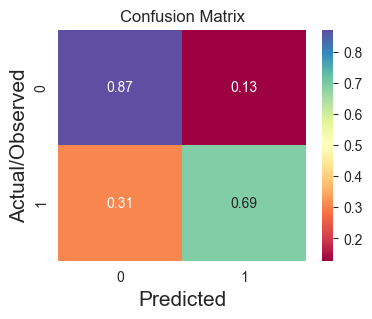

In [79]:
plot_confusion_matrix(y_test, multinomial_pred)

**Final Results**

| Model in Use | Accuracy (%) |
| --- | --- |
| Gaussian Naive Bayes |  84 |
| Gaussian Naive Bayes + Selected Features |  77 |
| Gaussian Naive Bayes + Over Sampling |  82 |
| Multinomial Naive Bayes + Laplace Smoothing |  78 |


    1. Of all the models, the Gaussian Naive Bayes performed the best with an accuracy score of 84%.
    2. The oversampling of data also performed in line with that of Gaussian Naive Bayes.
    3. Range of accuracy: [78 - 84 %] both inclusive.
    
    - The accuracy values might vary when new runs are made, but the range remains intact.